In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Water Quality Testing.csv")
df.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample ID                500 non-null    int64  
 1   pH                       500 non-null    float64
 2   Temperature (°C)         500 non-null    float64
 3   Turbidity (NTU)          500 non-null    float64
 4   Dissolved Oxygen (mg/L)  500 non-null    float64
 5   Conductivity (µS/cm)     500 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [ ]:
df.describe()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,7.161140,22.054400,4.169400,8.382200,344.362000
std,144.481833,0.107531,0.903123,0.397492,0.822396,13.038672
min,1.000000,6.830000,20.300000,3.100000,6.000000,316.000000
25%,125.750000,7.080000,21.200000,3.800000,7.800000,333.000000
50%,250.500000,7.160000,22.200000,4.200000,8.400000,344.000000
75%,375.250000,7.250000,22.900000,4.500000,9.100000,355.000000
max,500.000000,7.480000,23.600000,5.100000,9.900000,370.000000


In [ ]:
df.isnull().sum()

,0
Sample ID,0
pH,0
Temperature (°C),0
Turbidity (NTU),0
Dissolved Oxygen (mg/L),0
Conductivity (µS/cm),0


[]

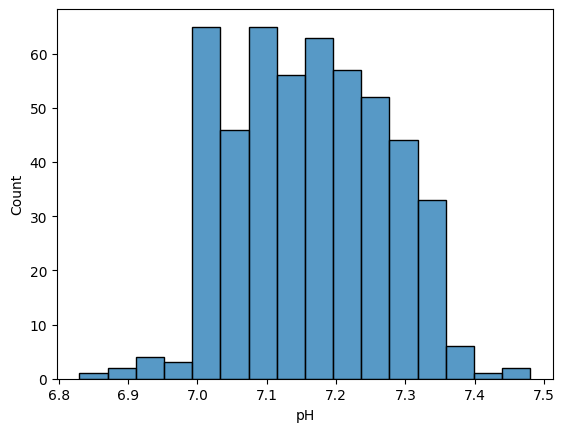

In [ ]:
sns.histplot(df["pH"])
plt.plot()

In [ ]:
x = df.drop(columns=["pH"])
y = df["pH"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# (80% train, 20% test)

In [ ]:
x

,Sample ID,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,23.1,4.5,7.8,342
1,2,22.3,5.1,6.2,335
2,3,21.5,3.9,8.3,356
3,4,22.9,3.2,9.5,327
4,5,20.7,3.8,8.1,352
...,...,...,...,...,...
495,496,20.8,4.6,7.1,327
496,497,22.5,3.8,9.4,361
497,498,21.2,4.7,7.5,334
498,499,23.0,3.9,8.7,359


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 0.05446010137156794
Mean Squared Error: 0.00557795503401215
R-squared Score: 0.4737078201900302
